# ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ - ΕΡΓΑΣΙΑ 2

### ΕΥΘΥΜΙΟΣ ΓΡΗΓΟΡΑΚΗΣ - ΑΕΜ: 9694
### ΑΝΕΣΤΗΣ ΚΑΪΜΑΚΑΜΙΔΗΣ - ΑΕΜ: 9627

In [1]:
!pip install numpy 
!pip install matplotlib

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

# ΜΕΡΟΣ Α

#### ΕΡΩΤΗΜΑ 1

2.5925925925925917
-3.153153153153153


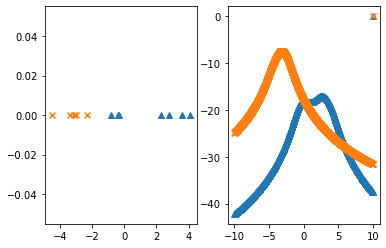

In [3]:
'''
maxtheta function: takes as input a dataset and a linespace (1 feature) and outputs maximum theta and max thetas distribution
by implementing maximum likelihood algorithm
'''
def maxtheta(dataset,linespace):
    max = - np.inf
    
    
    Ltheta = np.zeros(linespace.size)

    for i in range(linespace.size-1):
        tmp_max = 1
        for j in range(dataset.size):
            tmp_max *= (1/np.pi) * (1/(1+pow(dataset[j] - linespace[i],2)))
            Ltheta[i] = np.log(tmp_max)
        if tmp_max > max:
            theta = linespace[i]
        max = tmp_max

    return theta, Ltheta


#input dataset
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

x1 = np.array([[0, 0, 0, 0, 0, 0, 0]])
x2 = np.array([[0, 0, 0, 0, 0]])


#calculate class prior probabilities P(ω1), P(ω2)
P1 = len(D1)/(len(D1) + len(D2))
P2 = len(D2)/(len(D1) + len(D2))


#1 feature space
points =1000
linespace = np.linspace(-10,10,num=points)


fig = plt.figure()

#plot data
plt.subplot(1, 2, 1)
plt.scatter(D1,x1,marker = '^')
plt.scatter(D2,x2,marker = 'x' )


theta1_hat, Ltheta1 = maxtheta(D1,linespace)
theta2_hat, Ltheta2 = maxtheta(D2,linespace)

#plot maximum theta distribution
plt.subplot(1, 2, 2)
plt.scatter(linespace,Ltheta1,marker = '^')
plt.scatter(linespace,Ltheta2,marker = 'x')

#print maximum theta
print(theta1_hat)
print(theta2_hat)

plt.show()


#### ΕΡΩΤΗΜΑ 2

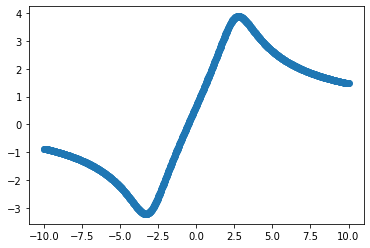

value :  class
2.8 :  1.0
-0.4 :  1.0
-0.8 :  1.0
2.3 :  1.0
-0.3 :  1.0
3.6 :  1.0
4.1 :  1.0
-4.5 :  2.0
-3.4 :  2.0
-3.1 :  2.0
-3.0 :  2.0
-2.3 :  2.0


In [4]:
#classifier class
class Classifier:
    #function fit returns the maximum theta according to input data
    def fit(data,theta):
        max = - np.inf

        for i in range(theta.size):
            tmp_max = 1
            for j in range(data.size):
                tmp_max = tmp_max * (1/np.pi) * (1/(1+pow(data[j] - theta[i],2)))
            if tmp_max > max:
                theta_hat = theta[i]
            max = tmp_max

        return theta_hat

    #function predict returns the prediction of a trained model on given data
    def predict(data,P1,P2):
        gx = np.zeros(data.size)

        for i in range(data.size):
            gx[i] = np.log((1/np.pi) * (1/(1+pow(data[i] - theta1_hat,2)))) - np.log((1/np.pi) * (1/(1+pow(data[i] - theta2_hat,2)))) + np.log(P1) - np.log(P2)

        return gx 

classes = Classifier



#train
theta1_hat = classes.fit(D1,linespace)

theta2_hat = classes.fit(D2,linespace)


data_points = np.array(linespace)
result = np.zeros(points)
for i in range(points):
    result= classes.predict(data_points, P1, P2)

plt.figure()
plt.scatter(linespace, result)
plt.show()

#test
D = np.append(D1,D2)
gx = classes.predict(D,P1,P2)

Dclass = np.zeros(D.size)

for i in range(D.size):
    if gx[i] > -1:
        Dclass[i] = 1
    else:
        Dclass[i] = 2

print("value :  class")
for i in range(len(D)):
    print(D[i], ": ",Dclass[i])
        

## Σχολιασμός 

Όπως μπορούμε να δούμε απο την γραφική παράσταση του ερωτήματος 1, με τα δεδομένα, ο κανόνας απόφασης θα είναι η κατακόρυφος που βρίσκεται στο  μέσο των δύο ακραίων σημείων κάθε κλάσης, τα οποία βρίσκονται κοντινότερα στην άλλη κλάσση.Στην περίπτωση μας, αποφασίζουμε οτι κάποια είσοδος ανήκει στην κλάση 1 όταν $g(x) > -1$ και αντίστοιχα κλάση 2 όταν $g(x) < -1$.

# ΜΕΡΟΣ Β

#### ΕΡΩΤΗΜΑ 1

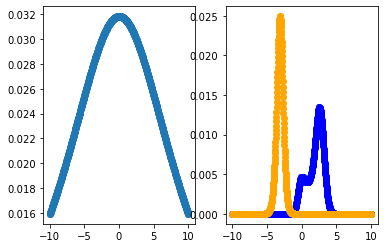

In [5]:
#function that calculates the integral p(D|θ)P(θ)d(θ) and also p(D|θ) and returns them
def integral1(data,linespace,ptheta):
    pDth = np.zeros(linespace.size)
    for i in range(linespace.size):
        pDth[i] = 1
        for j in range(data.size):
            pDth[i] *= (1/np.pi) * (1/(1+pow(data[j] - linespace[i],2)))
    
    pDth_pth = np.zeros(linespace.size)
    for i in range(linespace.size):
        pDth_pth[i] = pDth[i] * ptheta[i]


    #trapezium rule
    step = (linespace[-1] - linespace[0])/linespace.size
    sum = 0

    for i in range(linespace.size - 1):
        sum = sum + ((pDth_pth[i] + pDth_pth[i + 1]))*step/2

    return sum, pDth_pth


#store give p(θ)
ptheta = np.zeros(points)

for i in range(points):
    ptheta[i] = (1/(10*np.pi)) * (1/(1+pow(linespace[i]/10,2)))



result1, pDth_pth1 = integral1(D1,linespace,ptheta)
result2, pDth_pth2= integral1(D2,linespace,ptheta)



pth_D1 = np.zeros(points)
pth_D2 = np.zeros(points)

#calculate p(θ|D)
for i in range(points):
    pth_D1[i] = (pDth_pth1[i] * ptheta[i])/result1
    pth_D2[i] = (pDth_pth2[i] * ptheta[i])/result2



fig = plt.figure()

#plot ptheta
plt.subplot(1, 2, 1)
plt.scatter(linespace,ptheta)


#plot p(θ|D1) and p(θ|D2)
plt.subplot(1, 2, 2)
plt.scatter(linespace,pth_D1, c='blue')
plt.scatter(linespace,pth_D2, c='orange')
plt.show()


#### ΕΡΩΤΗΜΑ 2

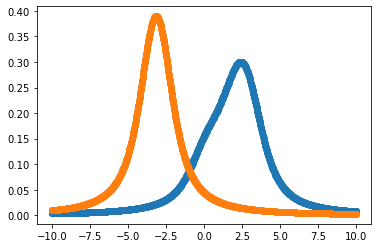

In [6]:
#function that calculates the integral p(x|θ,D)p(θ|D)d(θ) and returns it
def integral2(linespace, pth_D):
    p_x_theta_D = np.zeros((points,points))
    for i in range(points):
        for j in range(points):
            p_x_theta_D[i,j] = pth_D[i] *  (1/np.pi) * (1/(1+pow(linespace[j] - linespace[i],2)))
    
    p_x_theta_D = np.sum(p_x_theta_D, axis=0)


    #trapezium rule
    step = (linespace[-1] - linespace[0])/linespace.size
    sum = 0

    for i in range(linespace.size - 1):
        sum = sum + ((p_x_theta_D[i] + p_x_theta_D[i + 1]))*step/2
    
    return p_x_theta_D

p_x_theta_D1 = integral2(linespace, pth_D1)
p_x_theta_D2 = integral2(linespace, pth_D2)


#plot p(x|D1) and p(x|D2)
plt.figure()
plt.scatter(linespace, p_x_theta_D1)
plt.scatter(linespace, p_x_theta_D2)
plt.show()
    

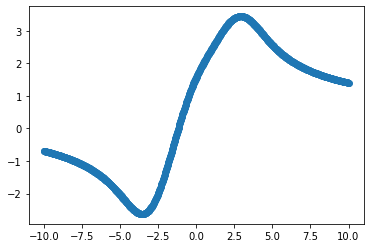

value :  class
2.8 :  1.0
-0.4 :  1.0
-0.8 :  1.0
2.3 :  1.0
-0.3 :  1.0
3.6 :  1.0
4.1 :  1.0
-4.5 :  2.0
-3.4 :  2.0
-3.1 :  2.0
-3.0 :  2.0
-2.3 :  2.0


In [7]:
#function that predicts according to the pre claculated probability distributins p(x|D1) : px1 and p(x|D2): px2
# P1 is P(ω1) and  P2 is P(ω2)
#x is given as an index on the current linespace (-10,10,points=1000)
def predict(x, px1, px2, P1, P2):
    return np.log(px1[x]) - np.log(px2[x]) + np.log(P1) - np.log(P2)

#plot prediction for each one of the points
result = np.zeros(points)
for i in range(points):
    result[i] = predict(i, p_x_theta_D1, p_x_theta_D2, P1, P2)


plt.figure()
plt.scatter(linespace, result)
plt.show()

#predictions for given data
predictions = np.zeros(len(D))

for i in range(len(D)):
    #transform data to linespace indexes
    x = int((D[i] + 10) * 1000/20)
    predictions[i] = predict(x, p_x_theta_D1, p_x_theta_D2, P1, P2) 


Dclass = np.zeros(D.size)

for i in range(D.size):
    if predictions[i] > -1:
        Dclass[i] = 1
    else:
        Dclass[i] = 2

print("value :  class")
for i in range(len(D)):
    print(D[i], ": ",Dclass[i])
        

## Σχολιασμός

Από το ερώτημα 1, βλέπουμε ότι οι $p(θ|D_i)$ είναι συγκεντρομένες γύρω απο τα σημεία στα οποία υπάρχουν περισσότερα δείγματα από κάθε κλάση.